<center><h2>COMP40020: Human Language Technologies
Assignment 1 </h2></center>


#### imports

In [1]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import praw
from praw.models import MoreComments
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer



### references:
- Code was adapted from the following resources as well as code from the labs:
-  https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/
- https://medium.com/@kiddojazz/reddit-sentiment-analysis-f8a1a790124a
- https://towardsdatascience.com/automate-sentiment-analysis-process-for-reddit-post-textblob-and-vader-8a79c269522f

In [7]:
ci = "fQeiW15Vp7PWost_U0QkaA" #your client id
cs = "p2LFKOI2h6gyQ_Y3A9ilM-hprJGMiA" #your client secret
ua = "busterorwha" #your user agent name


In [6]:

reddit = praw.Reddit(client_id=ci,
                     client_secret=cs,
                     user_agent=ua)




### sets to hold headlines

In [4]:
headlines = set()
headlines_newZealand = set()

### Looking at 900 new post titles 

In [5]:
# r/ireland
for submission in reddit.subreddit('ireland').new(limit=900):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

965


In [6]:
# r/newzealand
for submission in reddit.subreddit('newzealand').new(limit=900):
    headlines_newZealand.add(submission.title)
    display.clear_output()
    print(len(headlines_newZealand))

966


### r/ireland

In [14]:
# function for sentiment analysis 
def sia_function(headlines):

    sia = SIA()
    results = []

    for line in headlines:
        pol_score = sia.polarity_scores(line)
        pol_score['headline'] = line
        results.append(pol_score)
        
    return results

    

In [7]:
# sentiment intensity analyser 

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.3182,
  'headline': 'Petrol and diesel prices to increase by 2c per litre from today [National Oil '
              'Reserves Agency (NORA) levy has been reinstated]',
  'neg': 0.0,
  'neu': 0.897,
  'pos': 0.103},
 {'compound': 0.0, 'headline': 'Which of ye was it lads?', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Ireland Thinks/Sunday Indo Dáil Éireann poll, 3 March 2023: SF: 29% (-2), FG: 21% '
              '(-1), FG 19% (+1), SD: 9% (+5), GP: 4% (n/c), PBP/S: 2% (-1), LAB: 3% (-1), AON: 3% '
              '(-1)',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


### r/newzealand

In [8]:
results_nz = sia_function(headlines_newZealand)
pprint(results_nz[:3], width=100)

[{'compound': 0.0, 'headline': 'Australian Passport times', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': -0.1298,
  'headline': "Auckland Mayor Wayne Brown's diary almost empty day of the flood",
  'neg': 0.131,
  'neu': 0.869,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Does anyone know what kind of spider this is?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


### dataframe r/ireland

In [9]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.0,0.897,0.103,0.3182,Petrol and diesel prices to increase by 2c per...
1,0.0,1.000,0.000,0.0000,Which of ye was it lads?
2,0.0,1.000,0.000,0.0000,"Ireland Thinks/Sunday Indo Dáil Éireann poll, ..."
3,0.0,1.000,0.000,0.0000,Any tips for a cycling on backroads?
4,0.0,1.000,0.000,0.0000,Muslim Sisters of Eire on Twitter [People from...


### defining positive and negative label

In [72]:
def define_positive(df):
    df['label'] = 0
    df.loc[df['compound'] > 0.2, 'label'] = 1
    df.loc[df['compound'] < -0.2, 'label'] = -1
    return df
    

In [10]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.0,0.897,0.103,0.3182,Petrol and diesel prices to increase by 2c per...,1
1,0.0,1.000,0.000,0.0000,Which of ye was it lads?,0
2,0.0,1.000,0.000,0.0000,"Ireland Thinks/Sunday Indo Dáil Éireann poll, ...",0
3,0.0,1.000,0.000,0.0000,Any tips for a cycling on backroads?,0
4,0.0,1.000,0.000,0.0000,Muslim Sisters of Eire on Twitter [People from...,0


### dataframe r/newzealand

In [11]:
df_nz = pd.DataFrame.from_records(results_nz)
df_nz.head()

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,Australian Passport times
1,0.131,0.869,0.000,-0.1298,Auckland Mayor Wayne Brown's diary almost empt...
2,0.000,1.000,0.000,0.0000,Does anyone know what kind of spider this is?
3,0.000,0.841,0.159,0.1779,Growing momentum for ‘David and Goliath’ offic...
4,0.000,0.536,0.464,0.3818,Real wage growth 1990-2022


### defining positive and negative label

In [12]:
df_nz['label'] = 0
df_nz.loc[df_nz['compound'] > 0.2, 'label'] = 1
df_nz.loc[df_nz['compound'] < -0.2, 'label'] = -1
df_nz.head()

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,Australian Passport times,0
1,0.131,0.869,0.000,-0.1298,Auckland Mayor Wayne Brown's diary almost empt...,0
2,0.000,1.000,0.000,0.0000,Does anyone know what kind of spider this is?,0
3,0.000,0.841,0.159,0.1779,Growing momentum for ‘David and Goliath’ offic...,0
4,0.000,0.536,0.464,0.3818,Real wage growth 1990-2022,1


### example of positive and neg headlines r/ireland

In [13]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['Petrol and diesel prices to increase by 2c per litre from today [National Oil Reserves Agency (NORA) levy has been reinstated]',
 'Tesla owners in Ireland: is it a good buy?',
 'NCT free test review raises ‘serious questions’, Road Safety Authority told',
 "I'm looking to buy a 'live edge' treated wood block to mount a sink on, have found one on Etsy (see below) but would like an Irish one!",
 'Do guys in Ireland enjoy lip filler?']

Negative headlines:

['Around 2,000 badgers illegally killed every year in NI',
 'Domestic economy entered technical recession at end of last year',
 'Anyone here travelled to Brazil recently and if so did u need to show negative PCR in Brazilian airport?',
 'UPATE--I got Tired of being fat & Ugly. Today I managed a Full Murph for the first time.',
 'Ireland vulnerable to Russian espionage with many spy agents ‘likely’ to be across the country already']


### example of positive and neg headlines r/newzealand

In [14]:
print("Positive headlines:\n")
pprint(list(df_nz[df_nz['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df_nz[df_nz['label'] == -1].headline)[:5], width=200)

Positive headlines:

['Real wage growth 1990-2022',
 'Participation award of the week goes to!',
 'The amount of New Zealanders who support Russia is concerning',
 'New Zealand needs to set up racing tracks for the public free of charge',
 'HdPA Security Guards']

Negative headlines:

["NZ's Nightmare Scenario In Ukraine War",
 "Defence Minister Andrew Little says military 'under pressure' as Pacific becomes contested",
 'does the certificate of particulars show if your drivers license is suspended?',
 'Rachel Smalley: Campbell’s comments don’t impact the lives of patients. Pharmac’s failings do.',
 'Does workplace ostracism & cliquey-ness exist in corporate/white collar New Zealand, and have you experienced it as a shy/socially anxious person?']


### looking at value counts r/ireland

In [15]:
print(df.label.value_counts())
print(df.label.value_counts(normalize=True) * 100)


 0    524
 1    235
-1    206
Name: label, dtype: int64
 0    54.300518
 1    24.352332
-1    21.347150
Name: label, dtype: float64


### looking at value counts r/newzealand

In [16]:
print(df_nz.label.value_counts())
print(df_nz.label.value_counts(normalize=True) * 100)

 0    565
-1    214
 1    187
Name: label, dtype: int64
 0    58.488613
-1    22.153209
 1    19.358178
Name: label, dtype: float64


### graph comparing results 

code adapted from: https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged 

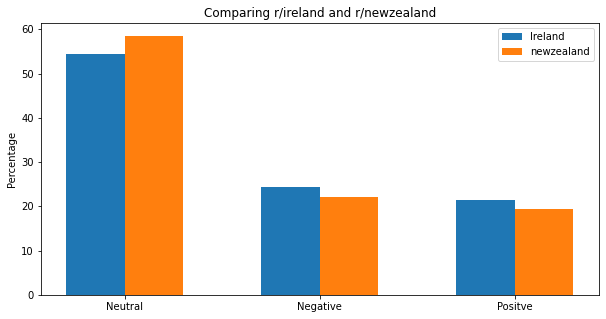

In [32]:

N = 3

blue_bar = (counts_ireland)
orange_bar = (counts_nz)

# Position of bars on x-axis
ind = np.arange(N)
# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Ireland')
plt.bar(ind + width, orange_bar, width, label='newzealand')

plt.ylabel('Percentage')
plt.title('Comparing r/ireland and r/newzealand')

plt.xticks(ind + width / 2, ('Neutral', 'Negative', 'Positve'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

### Newzealand

In [34]:
# fig, ax = plt.subplots(figsize=(8, 8))

# counts_nz = df_nz.label.value_counts(normalize=True) * 100

# sns.barplot(x=counts_nz.index, y=counts_nz, ax=ax)

# ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
# ax.set_ylabel("Percentage")

# plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(8, 8))

# counts_ireland = df.label.value_counts(normalize=True) * 100

# sns.barplot(x=counts_ireland.index, y=counts_ireland, ax=ax)

# ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
# ax.set_ylabel("Percentage")

# plt.show()

### Looking at headlines in more detail:

In [46]:
# tokenizer that only looks at works, removes punctuation
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')

def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
#         removing stop words
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

### r/newzealand "positive" headlines

In [48]:
pos_lines_nz = list(df_nz[df_nz.label == 1].headline)

pos_tokens_nz = process_text(pos_lines_nz)
pos_freq_nz = nltk.FreqDist(pos_tokens_nz)

pos_freq_nz.most_common(20)

[('best', 19),
 ('nz', 19),
 ('new', 18),
 ('help', 15),
 ('anyone', 12),
 ('good', 11),
 ('zealand', 10),
 ('looking', 8),
 ('people', 7),
 ('increase', 7),
 ('week', 6),
 ('auckland', 6),
 ('free', 5),
 ('kiwi', 5),
 ('cyclone', 5),
 ('like', 5),
 ('please', 5),
 ('pay', 5),
 ('get', 5),
 ('top', 5)]

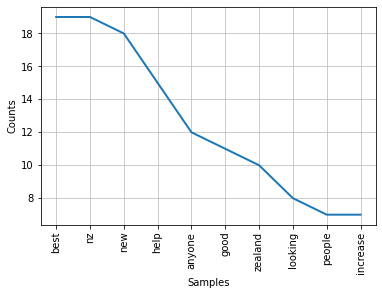

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [53]:
pos_freq_nz.plot(10)

### r/ireland - "positive" headlines 

In [51]:
pos_lines_ireland = list(df[df.label == 1].headline)

pos_tokens_ireland = process_text(pos_lines_ireland)
pos_freq_ireland = nltk.FreqDist(pos_tokens_ireland)

pos_freq_ireland.most_common(20)

[('ireland', 32),
 ('irish', 21),
 ('like', 20),
 ('dublin', 16),
 ('anyone', 15),
 ('would', 14),
 ('best', 14),
 ('good', 12),
 ('free', 11),
 ('one', 10),
 ('looking', 9),
 ('house', 9),
 ('help', 9),
 ('2', 9),
 ('see', 8),
 ('new', 8),
 ('place', 8),
 ('people', 8),
 ('lads', 8),
 ('time', 7)]

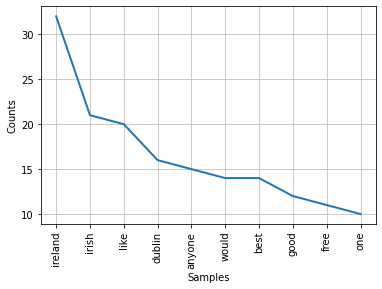

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [52]:
pos_freq_ireland.plot(10)

### r/newzealand "negative" headlines

In [56]:
neg_lines_nz = list(df_nz[df_nz.label == -1].headline)

neg_tokens_nz = process_text(neg_lines_nz)
neg_freq_nz = nltk.FreqDist(neg_tokens_nz)

neg_freq_nz.most_common(20)

[('nz', 21),
 ('new', 15),
 ('auckland', 15),
 ('cyclone', 14),
 ('police', 10),
 ('wrong', 9),
 ('murder', 8),
 ('gabrielle', 8),
 ('change', 8),
 ('zealand', 7),
 ('climate', 7),
 ('slash', 7),
 ('says', 6),
 ('campbell', 6),
 ('complaint', 6),
 ('forestry', 6),
 ('minister', 5),
 ('pharmac', 5),
 ('health', 5),
 ('work', 5)]

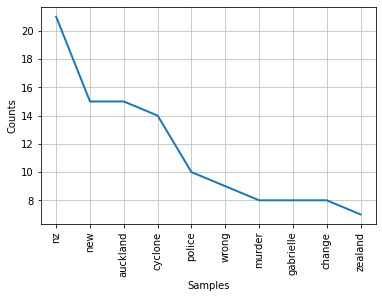

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [60]:
neg_freq_nz.plot(10)

### r/ireland - "negative" headlines 

In [57]:
neg_lines_ireland = list(df[df.label == -1].headline)

neg_tokens_ireland = process_text(neg_lines_ireland)
neg_freq_ireland = nltk.FreqDist(neg_tokens_ireland)

neg_freq_ireland.most_common(20)

[('irish', 18),
 ('ireland', 16),
 ('ban', 12),
 ('people', 11),
 ('dublin', 10),
 ('year', 9),
 ('eviction', 9),
 ('000', 7),
 ('car', 7),
 ('man', 7),
 ('go', 7),
 ('2', 6),
 ('end', 6),
 ('first', 6),
 ('murder', 6),
 ('would', 6),
 ('court', 6),
 ('u', 5),
 ('airport', 5),
 ('got', 5)]

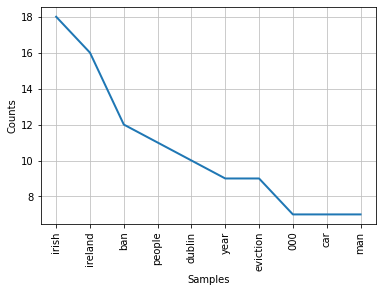

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [58]:
neg_freq_ireland.plot(10)

### Looking at top 900 post titles 

In [64]:
headlines_ireland_top = set()
headlines_newZealand_top = set()

In [65]:
for submission in reddit.subreddit('newzealand').top(limit=900):
    headlines_newZealand_top.add(submission.title)
    display.clear_output()
    print(len(headlines_newZealand_top))

900


In [66]:
for submission in reddit.subreddit('ireland').top(limit=900):
    headlines_ireland_top.add(submission.title)
    display.clear_output()
    print(len(headlines_ireland_top))

897


### Sentiment intensity analysis r/ireland

In [69]:
results_ireland_top =  sia_function(headlines_ireland_top)
pprint(results_ireland_top[:3], width=100)


[{'compound': 0.0,
  'headline': 'Irish people who use American political terms such as "Liberals" and "Snowflakes" '
              'should be referred to as East Yanks.',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0, 'headline': 'Frankie at it again', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0, 'headline': 'OOF', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}]


### Sentiment intensity analysis r/newzealand

In [70]:
results_newzealand_top =  sia_function(headlines_newZealand_top)
pprint(results_newzealand_top[:3], width=100)


[{'compound': -0.3818,
  'headline': 'Epic Pukeko battle captured by Martin Sanders. So much going on here.',
  'neg': 0.191,
  'neu': 0.809,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': "Last year during lockdown I wrote and illustrated my first ever children's book. "
              "This week, it was in the front window of Little Unity. (it's the 'my cat can see "
              "ghosts' one!)",
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.2263,
  'headline': 'The high speed rail network I would construct if I had more money than sense ft. a '
              'tunnel under Cook Straight maybe?',
  'neg': 0.0,
  'neu': 0.905,
  'pos': 0.095}]


In [71]:
df_top_ireland = pd.DataFrame.from_records(results_ireland_top)
df_top_nz = pd.DataFrame.from_records(results_newzealand_top)


In [73]:
define_positive(df_top_ireland)

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,Irish people who use American political terms ...,0
1,0.000,1.000,0.000,0.0000,Frankie at it again,0
2,0.000,1.000,0.000,0.0000,OOF,0
3,0.000,0.887,0.113,0.6801,This aerial shot of Achill Island in Co. Mayo ...,1
4,0.000,0.880,0.120,0.1280,Sandwiches in Subway 'too sugary to meet legal...,0
...,...,...,...,...,...,...
892,0.259,0.741,0.000,-0.4215,Under 35’s experiencing their second “once in ...,-1
893,0.000,0.545,0.455,0.3612,It be like that,1
894,0.000,1.000,0.000,0.0000,After hours of extensive research and data ana...,0
895,0.202,0.721,0.077,-0.8460,On This Day in 1922 A bomb was thrown into a g...,-1


In [74]:
define_positive(df_top_nz)

,neg,neu,pos,compound,headline,label
0,0.191,0.809,0.000,-0.3818,Epic Pukeko battle captured by Martin Sanders....,-1
1,0.000,1.000,0.000,0.0000,Last year during lockdown I wrote and illustra...,0
2,0.000,0.905,0.095,0.2263,The high speed rail network I would construct ...,1
3,0.000,0.580,0.420,0.4404,Per day bank profits 😮‍💨,1
4,0.000,1.000,0.000,0.0000,People of New Zealand: 6.30am Flight to Sydney...,0
...,...,...,...,...,...,...
895,0.000,0.828,0.172,0.3612,NZ Meme Pages Telling It Like It Is | We're al...,1
896,0.000,0.802,0.198,0.5719,Update to previous thread: I won my Consumer G...,1
897,0.000,0.748,0.252,0.4019,Remember to support them when this is all over,1
898,0.000,1.000,0.000,0.0000,Puts it into perspective of what was achieved ...,0


In [75]:
print("Positive headlines r/ireland:\n")
pprint(list(df_top_ireland[df_top_ireland['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines r/ireland:\n")
pprint(list(df_top_ireland[df_top_ireland['label'] == -1].headline)[:5], width=200)

Positive headlines :

['This aerial shot of Achill Island in Co. Mayo is one of the most outstanding photos of Ireland I’ve ever seen. Martin Maguire is the man behind the 📸. His website is www.091pix.com + IG is 091pix '
 'if you want to have a look at his other stuff.',
 'Sharon congrats 😊',
 "Now I'm not sure if you celebrate this day or not but might as well. Greetings from Montenegro, we wanted to wish you a happy April 24th and of course, good health for the entire year and more to "
 'come!',
 "Opinion: The gym is great, but please don't insult us by suggesting it's the answer to mental illness",
 'As an American I’ve never heard of an immersion heater. I think I’ve hit a milestone after living in Ireland for 2 years when I shouted up to my wife to make sure the immersion was off.']

Negative headlines:

['What a fucking disaster!', 'Some people lads, what be wrong with them', 'Licence to kill', 'Dublin fucked forever.', 'Ever been on the way to work and just think “Ah, fuck it.

In [76]:
print("Positive headlines r/newzealand:\n")
pprint(list(df_top_nz[df_top_nz['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines r/newzealand:\n")
pprint(list(df_top_nz[df_top_nz['label'] == -1].headline)[:5], width=200)

Positive headlines r/newzealand:

['The high speed rail network I would construct if I had more money than sense ft. a tunnel under Cook Straight maybe?',
 'Per day bank profits 😮\u200d💨',
 'Cool as a cucumber.',
 'Seconds fossil prep of the lockdown: a nice tumidocarcinus crab I collected on the South Island. I prepped BOTH sides this time',
 'Before last year I was lucky if I could run on the treadmill for 10 mins. Moving to New Zealand was the best decision of my life. Every day that I live here I’m am motivated by this country and '
 'its people. Today I finished my first half marathon.']

Negative headlines r/newzealand:

['Epic Pukeko battle captured by Martin Sanders. So much going on here.',
 'Anyone else find it sad that essential workers are minimum wage at the supermarket, risking their safety and being abused while the supermarkets are making bank?',
 'And another crazy sunrise in Christchurch',
 'Never felt luckier than today to live in this country',
 'Arrests as police b

### looking at value counts

In [77]:
print(df_top_ireland.label.value_counts())
print(df_top_ireland.label.value_counts(normalize=True) * 100)

 0    481
 1    266
-1    150
Name: label, dtype: int64
 0    53.623188
 1    29.654404
-1    16.722408
Name: label, dtype: float64


In [78]:
print(df_top_nz.label.value_counts())
print(df_top_nz.label.value_counts(normalize=True) * 100)

 0    461
 1    282
-1    157
Name: label, dtype: int64
 0    51.222222
 1    31.333333
-1    17.444444
Name: label, dtype: float64


In [80]:
counts_ireland_top = df_top_ireland.label.value_counts(normalize=True) * 100
counts_nz_top = df_top_nz.label.value_counts(normalize=True) * 100


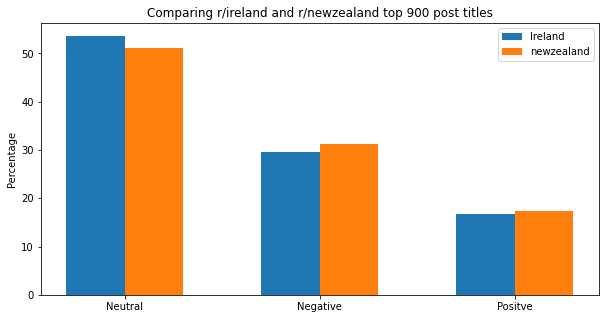

In [81]:
N = 3

blue_bar = (counts_ireland_top)
orange_bar = (counts_nz_top)

# Position of bars on x-axis
ind = np.arange(N)
# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Ireland')
plt.bar(ind + width, orange_bar, width, label='newzealand')

plt.ylabel('Percentage')
plt.title('Comparing r/ireland and r/newzealand top 900 post titles')

plt.xticks(ind + width / 2, ('Neutral', 'Negative', 'Positve'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [82]:
pos_lines_ireland = list(df_top_ireland[df_top_ireland.label == 1].headline)

pos_tokens_ireland = process_text(pos_lines_ireland)
pos_freq_ireland = nltk.FreqDist(pos_tokens_ireland)

pos_freq_ireland.most_common(20)

[('ireland', 43),
 ('irish', 31),
 ('like', 23),
 ('great', 18),
 ('lads', 18),
 ('day', 12),
 ('years', 12),
 ('today', 12),
 ('one', 11),
 ('dublin', 11),
 ('happy', 9),
 ('good', 9),
 ('year', 9),
 ('true', 9),
 ('sure', 8),
 ('think', 8),
 ('time', 8),
 ('well', 7),
 ('best', 7),
 ('better', 7)]

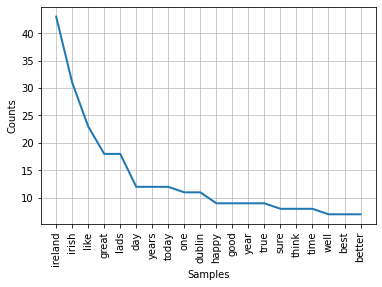

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [88]:
pos_freq_ireland.plot(20)


In [83]:
pos_lines_nz = list(df_top_nz[df_top_nz.label == 1].headline)

pos_tokens_nz = process_text(pos_lines_nz)
pos_freq_nz = nltk.FreqDist(pos_tokens_nz)

pos_freq_nz.most_common(20)

[('new', 47),
 ('zealand', 36),
 ('nz', 34),
 ('like', 29),
 ('good', 18),
 ('us', 13),
 ('country', 11),
 ('today', 11),
 ('love', 11),
 ('made', 10),
 ('proud', 10),
 ('people', 9),
 ('please', 9),
 ('day', 8),
 ('time', 8),
 ('best', 8),
 ('party', 8),
 ('free', 8),
 ('thank', 8),
 ('kiwi', 8)]

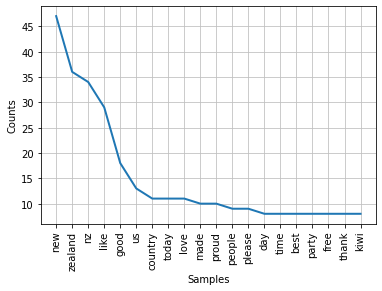

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [89]:
pos_freq_nz.plot(20)


In [84]:
neg_lines_ire = list(df_top_ireland[df_top_ireland.label == -1].headline)

neg_tokens_ire = process_text(neg_lines_ire)
neg_freq_ire = nltk.FreqDist(neg_tokens_ire)

neg_freq_ire.most_common(20)

[('irish', 19),
 ('ireland', 17),
 ('years', 12),
 ('dublin', 11),
 ('today', 11),
 ('one', 10),
 ('people', 8),
 ('ago', 8),
 ('day', 8),
 ('lads', 7),
 ('american', 6),
 ('get', 6),
 ('ya', 6),
 ('think', 5),
 ('like', 5),
 ('stop', 5),
 ('shit', 5),
 ('war', 5),
 ('got', 5),
 ('new', 5)]

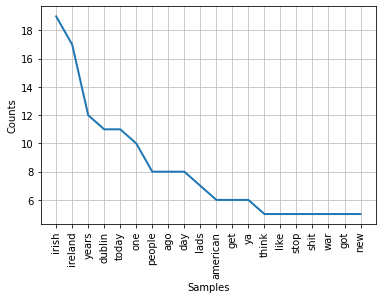

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [87]:
neg_freq_ire.plot(20)


In [85]:
neg_lines_nz = list(df_top_nz[df_top_nz.label == -1].headline)

neg_tokens_nz = process_text(neg_lines_nz)
neg_freq_nz = nltk.FreqDist(neg_tokens_nz)

neg_freq_nz.most_common(20)

[('new', 34),
 ('zealand', 29),
 ('nz', 16),
 ('today', 8),
 ('fuck', 8),
 ('country', 7),
 ('police', 7),
 ('world', 7),
 ('people', 6),
 ('covid', 6),
 ('auckland', 6),
 ('shit', 6),
 ('man', 6),
 ('much', 5),
 ('like', 5),
 ('get', 5),
 ('bad', 5),
 ('want', 5),
 ('crisis', 5),
 ('take', 4)]

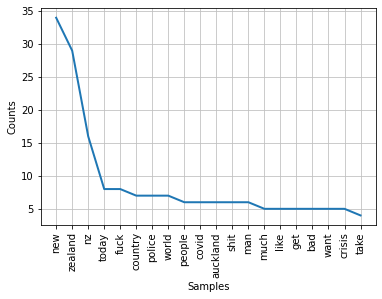

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [90]:
neg_freq_nz.plot(20)


### Looking at comments 

In [16]:
def sia_function(comments):

    sia = SIA()
    results = []

    for line in comments:
        pol_score = sia.polarity_scores(line)
        pol_score['comment'] = line
        results.append(pol_score)
        
    return results

### gathering comments from r/ireland

In [11]:
comments_ireland = set()
# r/ireland
for submission in reddit.subreddit('ireland').top(limit=10):
    for comment in submission.comments:
            if isinstance(comment, MoreComments):
                continue
            comments_ireland.add(comment.body)
            display.clear_output()
            print(len(comments_ireland))

    


1485


### gathering comments from r/newzeland

In [23]:
comments_nz = set()
# r/ireland
for submission in reddit.subreddit('newzealand').top(limit=10):
    for comment in submission.comments:
            if isinstance(comment, MoreComments):
                continue
            comments_nz.add(comment.body)
            display.clear_output()
            print(len(comments_nz))

    


1560


#### sentiment intensity analysis for comments r/ireland

In [17]:
comments_results_ireland = sia_function(comments_ireland)
pprint(comments_results_ireland[:3], width=100)

[{'comment': 'Scotland and Ireland joint hosts in 2030 LETS DO IT',
  'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'comment': 'We need to abolish Real Estate Investment Trusts.',
  'compound': 0.4767,
  'neg': 0.0,
  'neu': 0.693,
  'pos': 0.307},
 {'comment': "Boris's sanctions should solve everything.....",
  'compound': 0.2023,
  'neg': 0.0,
  'neu': 0.69,
  'pos': 0.31}]


#### sentiment intensity analysis for comments r/newzealand

In [25]:
comments_results_newzealand = sia_function(comments_nz)
pprint(comments_results_newzealand[:3], width=100)

[{'comment': 'Why the fuck dose newzeland give a shit',
  'compound': -0.7964,
  'neg': 0.587,
  'neu': 0.413,
  'pos': 0.0},
 {'comment': 'The whole system in the US is designed to prevent someone like her from getting '
             'elected.',
  'compound': 0.3818,
  'neg': 0.0,
  'neu': 0.795,
  'pos': 0.205},
 {'comment': 'People talk about y2k like that now: that it was a lot of panic over no big deal. '
             'But the truth is a lot of people worked very hard to make it no big deal.',
  'compound': -0.4385,
  'neg': 0.213,
  'neu': 0.67,
  'pos': 0.117}]


### converting results to dataframes 

In [18]:
df_comments_ireland = pd.DataFrame.from_records(comments_results_ireland)
df_comments_ireland.head()

,neg,neu,pos,compound,comment
0,0.000,1.000,0.000,0.0000,Scotland and Ireland joint hosts in 2030 LETS ...
1,0.000,0.693,0.307,0.4767,We need to abolish Real Estate Investment Trusts.
2,0.000,0.690,0.310,0.2023,Boris's sanctions should solve everything.....
3,0.140,0.833,0.027,-0.9741,"I had one landlord, a property company who's m..."
4,0.115,0.718,0.167,0.3378,"How can you help? You can talk about it, you c..."


In [26]:
df_comments_newzealand = pd.DataFrame.from_records(comments_results_newzealand)
df_comments_newzealand.head()

,neg,neu,pos,compound,comment
0,0.587,0.413,0.000,-0.7964,Why the fuck dose newzeland give a shit
1,0.000,0.795,0.205,0.3818,The whole system in the US is designed to prev...
2,0.213,0.670,0.117,-0.4385,People talk about y2k like that now: that it w...
3,0.073,0.573,0.354,0.7506,"If you gave me $1.9million, I would happily pa..."
4,0.344,0.656,0.000,-0.9207,I'm just reading about this and you've already...


### defining positive and negative comments based on compound score: 

In [20]:
df_comments_ireland['label'] = 0
df_comments_ireland.loc[df_comments_ireland['compound'] > 0.2, 'label'] = 1
df_comments_ireland.loc[df_comments_ireland['compound'] < -0.2, 'label'] = -1
df_comments_ireland.head()

,neg,neu,pos,compound,comment,label
0,0.000,1.000,0.000,0.0000,Scotland and Ireland joint hosts in 2030 LETS ...,0
1,0.000,0.693,0.307,0.4767,We need to abolish Real Estate Investment Trusts.,1
2,0.000,0.690,0.310,0.2023,Boris's sanctions should solve everything.....,1
3,0.140,0.833,0.027,-0.9741,"I had one landlord, a property company who's m...",-1
4,0.115,0.718,0.167,0.3378,"How can you help? You can talk about it, you c...",1


In [27]:
df_comments_newzealand['label'] = 0
df_comments_newzealand.loc[df_comments_newzealand['compound'] > 0.2, 'label'] = 1
df_comments_newzealand.loc[df_comments_newzealand['compound'] < -0.2, 'label'] = -1
df_comments_newzealand.head()

,neg,neu,pos,compound,comment,label
0,0.587,0.413,0.000,-0.7964,Why the fuck dose newzeland give a shit,-1
1,0.000,0.795,0.205,0.3818,The whole system in the US is designed to prev...,1
2,0.213,0.670,0.117,-0.4385,People talk about y2k like that now: that it w...,-1
3,0.073,0.573,0.354,0.7506,"If you gave me $1.9million, I would happily pa...",1
4,0.344,0.656,0.000,-0.9207,I'm just reading about this and you've already...,-1


### example of positive and negative comments  r/ireland

In [21]:
print("Positive comment:\n")
pprint(list(df_comments_ireland[df_comments_ireland['label'] == 1].comment)[:5], width=200)

print("\nNegative comment:\n")
pprint(list(df_comments_ireland[df_comments_ireland['label'] == -1].comment)[:5], width=200)

Positive comment:

['We need to abolish Real Estate Investment Trusts.',
 "Boris's sanctions should solve everything.....",
 'How can you help? You can talk about it, you can learn about it. I know a lot of people think that changing background or profile pic is stupid but it creates visibility. I know it is not your '
 "pain and not your problem but it's a war happening in Europe and we're all part of Europe.",
 "Awh Jesus, I've always said it, the Croatians are great bunch of fellas now so",
 'Are we going to let people fleeing the conflict in and be kind to them when they get here?']

Negative comment:

["I had one landlord, a property company who's manager left and stole all the utility money and everyone's in the complex's rent from them.   He also stole and destroyed all the lease documents.  "
 "When I moved out they tried to say they didn't have the lease so they had no way of knowing my deposit.  I had a copy.   They repeatedly refused saying it could have been doctored.  Then

### example of positive and negative comments  r/newzealand

In [28]:
print("Positive comment:\n")
pprint(list(df_comments_newzealand[df_comments_newzealand['label'] == 1].comment)[:5], width=200)

print("\nNegative comment:\n")
pprint(list(df_comments_newzealand[df_comments_newzealand['label'] == -1].comment)[:5], width=200)

Positive comment:

['The whole system in the US is designed to prevent someone like her from getting elected.',
 'If you gave me $1.9million, I would happily pay a measly $9k a year in wealth tax.',
 'Chur my kiwis! Proud of us all!',
 'Let’s be thankful he’s still around so he can spend the rest of his life behind bars. I wonder if he will be sent back to aus.',
 'I mean... Ive been trying to move to NZ for completely separate reasons for like 5 years.... Saving just never seem to stay']

Negative comment:

['Why the fuck dose newzeland give a shit',
 'People talk about y2k like that now: that it was a lot of panic over no big deal. But the truth is a lot of people worked very hard to make it no big deal.',
 "I'm just reading about this and you've already posted all the details half an hour ago? How in the fuck are you so quick?\n\nAlso fuck, this sucks. :(",
 'Kia kaha, Aucklanders. Sending good vibes from Welly.',
 'As an Aucklander, holy fuck. Maybe I was naive but did not see this

### looking at value counts

In [22]:
print(df_comments_ireland.label.value_counts())
print(df_comments_ireland.label.value_counts(normalize=True) * 100)

 1    550
-1    470
 0    465
Name: label, dtype: int64
 1    37.037037
-1    31.649832
 0    31.313131
Name: label, dtype: float64


In [29]:
print(df_comments_newzealand.label.value_counts())
print(df_comments_newzealand.label.value_counts(normalize=True) * 100)

 1    629
 0    470
-1    461
Name: label, dtype: int64
 1    40.320513
 0    30.128205
-1    29.551282
Name: label, dtype: float64


### visualising value counts 

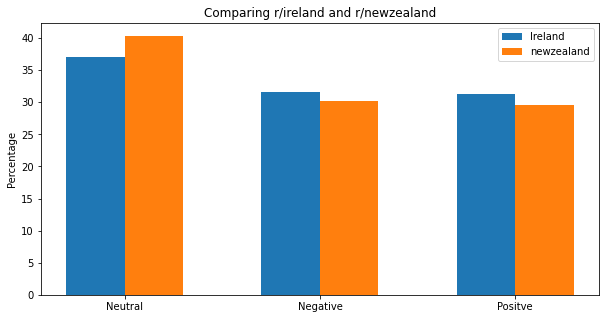

In [31]:
comments_counts_nz = df_comments_newzealand.label.value_counts(normalize=True) * 100
comments_counts_ireland =  df_comments_ireland.label.value_counts(normalize=True) * 100
N = 3

blue_bar = (comments_counts_ireland)
orange_bar = (comments_counts_nz)

# Position of bars on x-axis
ind = np.arange(N)
# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Ireland')
plt.bar(ind + width, orange_bar, width, label='newzealand')

plt.ylabel('Percentage')
plt.title('Comparing r/ireland and r/newzealand')

plt.xticks(ind + width / 2, ('Neutral', 'Negative', 'Positve'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [32]:
df_comments_ireland.head(10)

,neg,neu,pos,compound,comment,label
0,0.000,1.000,0.000,0.0000,Scotland and Ireland joint hosts in 2030 LETS ...,0
1,0.000,0.693,0.307,0.4767,We need to abolish Real Estate Investment Trusts.,1
2,0.000,0.690,0.310,0.2023,Boris's sanctions should solve everything.....,1
3,0.140,0.833,0.027,-0.9741,"I had one landlord, a property company who's m...",-1
4,0.115,0.718,0.167,0.3378,"How can you help? You can talk about it, you c...",1
5,0.000,0.773,0.227,0.6249,"Awh Jesus, I've always said it, the Croatians ...",1
6,0.000,1.000,0.000,0.0000,If you don't know what a bell pepper is the is...,0
7,0.714,0.286,0.000,-0.3612,That sucks.,-1
8,0.000,1.000,0.000,0.0000,Where’s the Shannon in this pic tho,0
9,0.068,0.932,0.000,-0.5113,How about your salary is taken into account bu...,-1


In [33]:
df_comments_ireland.describe()

,neg,neu,pos,compound,label
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.111438,0.742212,0.142296,0.036248,0.053872
std,0.163258,0.219192,0.183788,0.503418,0.827301
min,0.000000,0.000000,0.000000,-0.986200,-1.000000
25%,0.000000,0.612000,0.000000,-0.361200,-1.000000
50%,0.026000,0.773000,0.076000,0.000000,0.000000
75%,0.167000,0.917000,0.222000,0.440400,1.000000
max,1.000000,1.000000,1.000000,0.987400,1.000000


In [34]:
df_comments_newzealand.describe()

,neg,neu,pos,compound,label
count,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,0.106790,0.748525,0.142763,0.069173,0.107692
std,0.150094,0.198693,0.164744,0.529840,0.829193
min,0.000000,0.000000,0.000000,-0.991400,-1.000000
25%,0.000000,0.640750,0.000000,-0.336100,-1.000000
50%,0.051500,0.766000,0.107000,0.000000,0.000000
75%,0.167000,0.887000,0.216000,0.526700,1.000000
max,1.000000,1.000000,1.000000,0.988500,1.000000


### visualising compound scores for the sub reddits

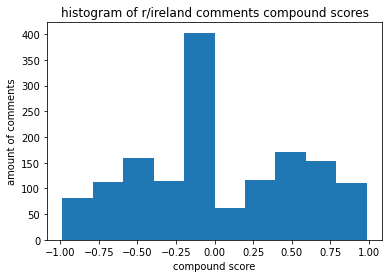

In [38]:
plt.hist(df_comments_ireland["compound"], bins=10)

plt.title('histogram of r/ireland comments compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

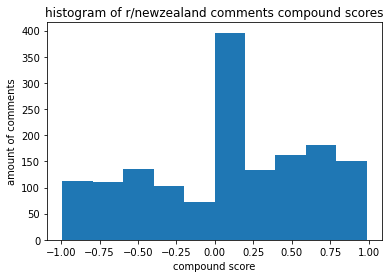

In [40]:
plt.hist(df_comments_newzealand["compound"], bins=10)

plt.title('histogram of r/newzealand comments compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

## box plots 

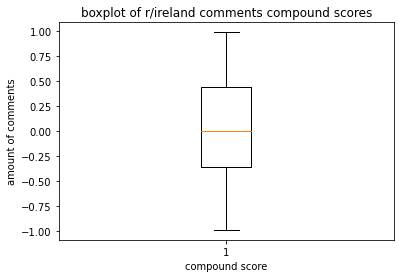

In [41]:
plt.boxplot(df_comments_ireland["compound"])

plt.title('boxplot of r/ireland comments compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

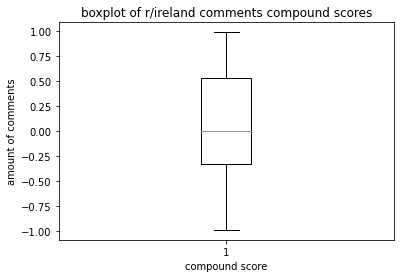

In [42]:
plt.boxplot(df_comments_newzealand["compound"])

plt.title('boxplot of r/ireland comments compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

### looking at positive comments in more detail

In [47]:
pos_comments_ireland = list(df_comments_ireland[df_comments_ireland.label == 1].comment)

pos_tokens_comments_ireland = process_text(pos_comments_ireland)
pos_freq_comments_ireland = nltk.FreqDist(pos_tokens_comments_ireland)

pos_freq_comments_ireland.most_common(20)

[('like', 81),
 ('ireland', 72),
 ('american', 69),
 ('us', 62),
 ('love', 57),
 ('get', 56),
 ('good', 45),
 ('people', 43),
 ('go', 39),
 ('well', 39),
 ('irish', 37),
 ('would', 36),
 ('back', 36),
 ('know', 34),
 ('great', 34),
 ('croatia', 34),
 ('one', 33),
 ('time', 33),
 ('need', 32),
 ('house', 32)]

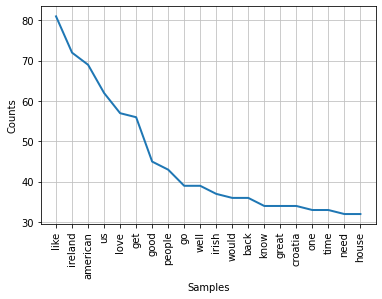

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [58]:
pos_freq_comments_ireland.plot(20)


In [48]:
pos_comments_nz = list(df_comments_newzealand[df_comments_newzealand.label == 1].comment)

pos_tokens_comments_nz = process_text(pos_comments_nz)
pos_freq_comments_nz = nltk.FreqDist(pos_tokens_comments_nz)

pos_freq_comments_nz.most_common(20)

[('people', 140),
 ('like', 117),
 ('nz', 89),
 ('new', 78),
 ('country', 73),
 ('us', 66),
 ('good', 63),
 ('zealand', 63),
 ('get', 61),
 ('well', 57),
 ('would', 55),
 ('vote', 49),
 ('want', 47),
 ('love', 45),
 ('time', 44),
 ('know', 44),
 ('much', 43),
 ('even', 43),
 ('make', 43),
 ('one', 41)]

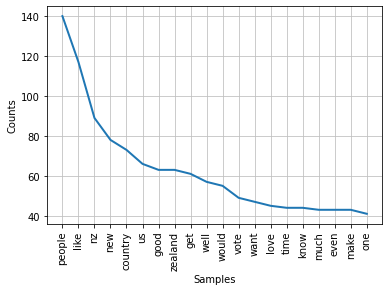

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [57]:
pos_freq_comments_nz.plot(20)


### looking at negative comments in more detail

In [51]:
neg_comments_ireland = list(df_comments_ireland[df_comments_ireland.label == -1].comment)

neg_tokens_comments_ireland = process_text(neg_comments_ireland)
neg_freq_comments_ireland = nltk.FreqDist(neg_tokens_comments_ireland)

neg_freq_comments_ireland.most_common(20)

[('us', 83),
 ('american', 73),
 ('people', 66),
 ('fuck', 64),
 ('get', 56),
 ('back', 53),
 ('deposit', 51),
 ('ban', 44),
 ('house', 43),
 ('rent', 42),
 ('ireland', 40),
 ('country', 39),
 ('like', 37),
 ('one', 35),
 ('shit', 34),
 ('fucking', 33),
 ('would', 32),
 ('years', 31),
 ('americans', 30),
 ('going', 29)]

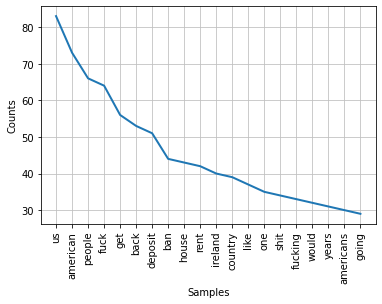

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [56]:
neg_freq_comments_ireland.plot(20)


In [53]:
neg_comments_nz = list(df_comments_newzealand[df_comments_newzealand.label == -1].comment)

neg_tokens_comments_nz = process_text(neg_comments_nz)
neg_freq_comments_nz = nltk.FreqDist(neg_tokens_comments_nz)

neg_freq_comments_nz.most_common(20)

[('people', 114),
 ('fuck', 74),
 ('like', 59),
 ('shit', 58),
 ('get', 54),
 ('tipping', 49),
 ('new', 48),
 ('nz', 45),
 ('one', 41),
 ('time', 41),
 ('us', 40),
 ('tip', 38),
 ('would', 37),
 ('pay', 35),
 ('fucking', 34),
 ('country', 33),
 ('zealand', 33),
 ('know', 32),
 ('covid', 31),
 ('go', 29)]

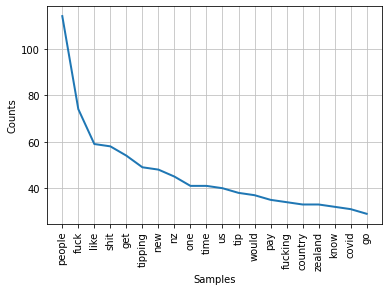

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [55]:
neg_freq_comments_nz.plot(20)
